<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np

# 'NVDA' - NVIDIA
# 'TSLA' - Tesla
# 'DIS' - Disney
# 'NFLX' - Netflix
# 'BABA' - Alibaba

tickers = ['NVDA','TSLA','DIS','NFLX','BABA']
today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=2)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'


data_list = []
for i in range(len(tickers)):
  data = web.DataReader(tickers[i], data_source, start_date, end_date)
  data_list.append(data)


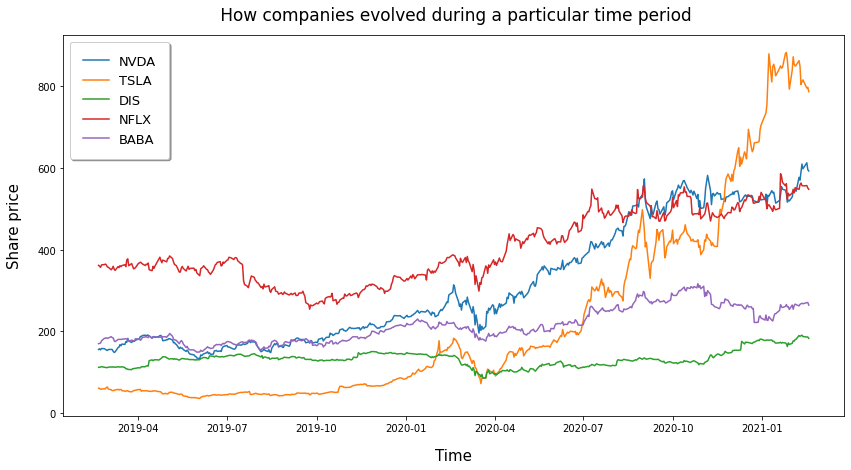

In [42]:

Close_1 = data_list[0].iloc[:, 5]
Close_2 = data_list[1].iloc[:, 5]
Close_3 = data_list[2].iloc[:, 5]
Close_4 = data_list[3].iloc[:, 5]
Close_5 = data_list[4].iloc[:, 5]

index = data_list[0].index

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, Close_1)
plt.plot(index, Close_2)
plt.plot(index, Close_3)
plt.plot(index, Close_4)
plt.plot(index, Close_5)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(['NVDA','TSLA','DIS','NFLX','BABA'], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


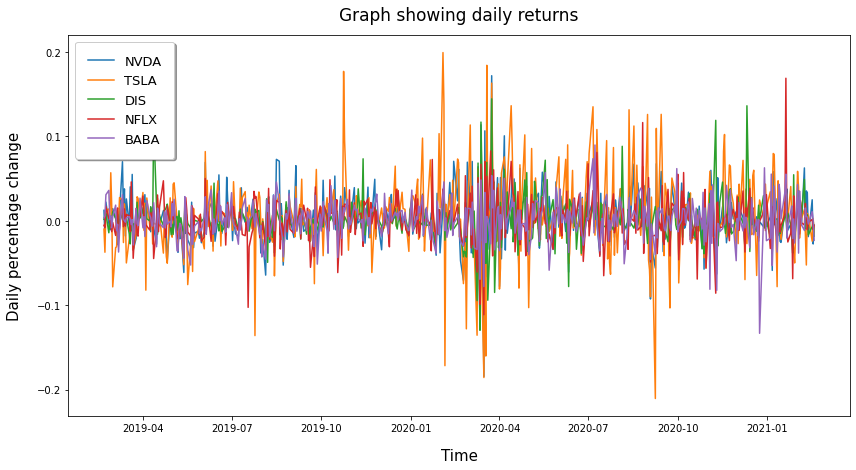

In [43]:

daily_return1 = data_list[0].iloc[:, 5].pct_change()
daily_return2 = data_list[1].iloc[:, 5].pct_change()
daily_return3 = data_list[2].iloc[:, 5].pct_change()
daily_return4 = data_list[3].iloc[:, 5].pct_change()
daily_return5 = data_list[4].iloc[:, 5].pct_change()

index = data_list[0].index

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, daily_return1)
plt.plot(index, daily_return2)
plt.plot(index, daily_return3)
plt.plot(index, daily_return4)
plt.plot(index, daily_return5)

plt.title("Graph showing daily returns",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Daily percentage change",fontsize=15,labelpad=15)
plt.legend(['NVDA','TSLA','DIS','NFLX','BABA'], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

In [ ]:
def creating_weights():
  l_weights = []
  for i in range(0,101,5):
      wage = i/100
      l_weights.append(wage)

  solutions = []
  for x in l_weights:
      for y in l_weights:
          for z in l_weights:
              for w in l_weights:
                  for o in l_weights:
                      sol = [x, y, z, w, o]
                      if sum(sol) == 1.0:
                          solutions.append(sol)
  return solutions

weights = creating_weights()
weights

In [55]:
data = web.DataReader(tickers, data_source, start_date, end_date)

adj_close = data["Adj Close"]
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,NVDA,TSLA,DIS,NFLX,BABA
Date,,,,,
2019-02-19,NaN,NaN,NaN,NaN,NaN
2019-02-20,0.012120,-0.010128,0.001497,-0.005569,0.003110
2019-02-21,-0.017689,-0.038166,0.005352,-0.008202,0.005550
2019-02-22,0.021718,0.011879,0.008365,0.016806,0.030182
2019-02-25,-0.003146,0.013682,-0.014508,0.002449,0.035154
...,...,...,...,...,...
2021-02-11,0.032420,0.008463,0.006727,-0.010703,0.004248
2021-02-12,-0.019165,0.005480,-0.017117,-0.001921,-0.004024
2021-02-16,0.024364,-0.024686,-0.007058,0.001365,0.010584


In [56]:
log_returns.mean() * 250

Symbols
NVDA    0.663224
TSLA    1.267729
DIS     0.242928
NFLX    0.205979
BABA    0.218761
dtype: float64

In [57]:
log_returns.cov() * 250

Symbols,NVDA,TSLA,DIS,NFLX,BABA
Symbols,,,,,
NVDA,0.235042,0.167732,0.080636,0.104720,0.094142
TSLA,0.167732,0.521029,0.076584,0.105953,0.085512
DIS,0.080636,0.076584,0.146232,0.035071,0.043297
NFLX,0.104720,0.105953,0.035071,0.169991,0.060195
BABA,0.094142,0.085512,0.043297,0.060195,0.133647


In [58]:
log_returns.corr()

Symbols,NVDA,TSLA,DIS,NFLX,BABA
Symbols,,,,,
NVDA,1.000000,0.479306,0.434943,0.523897,0.531166
TSLA,0.479306,1.000000,0.277449,0.356017,0.324051
DIS,0.434943,0.277449,1.000000,0.222441,0.309713
NFLX,0.523897,0.356017,0.222441,1.000000,0.399360
BABA,0.531166,0.324051,0.309713,0.399360,1.000000


Text(0, 0.5, 'Expected Return')

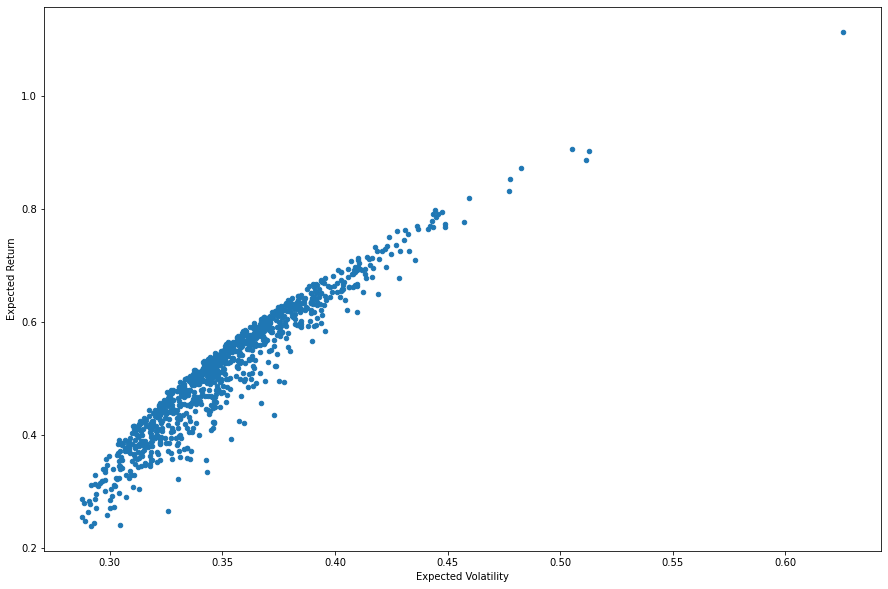

In [62]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
                                  
portfolio_returns[0]

np.sum(weights * log_returns.mean()) * 250

np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')